In [68]:
import pandas as pd
import numpy as np
import seaborn as sns

# ۱. بارگذاری دیتاست
df = sns.load_dataset('titanic')

# ۲. مشاهده ۵ سطر اول برای درک کلی
print("--- ۵ سطر اول دیتاست ---")
print(df.head())

# ۳. بررسی شناسنامه دیتا (تعداد داده‌های خالی و نوع ستون‌ها)
print("\n--- اطلاعات فنی و مقادیر خالی ---")
print(df.info())

# ۴. بررسی آماری (میانگین سن، قیمت بلیط و ...)
print("\n--- آمار توصیفی داده‌های عددی ---")
print(df.describe())

--- ۵ سطر اول دیتاست ---
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

--- اطلاعات فنی و مقادیر خالی ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------

In [69]:
# الف) بررسی ابعاد و کلیات
print(f"تعداد سطرها: {df.shape[0]} | تعداد ستون‌ها: {df.shape[1]}")
print("-" * 50)

تعداد سطرها: 891 | تعداد ستون‌ها: 15
--------------------------------------------------


In [70]:
# ب) بررسی دقیق مقادیر خالی (Missing Values) به درصد
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
print("درصد مقادیر خالی در هر ستون:")
print(pd.concat([missing_data, missing_percentage.map('{:.2f}%'.format)], axis=1, keys=['تعداد', 'درصد']))
print("-" * 50)

درصد مقادیر خالی در هر ستون:
             تعداد    درصد
survived         0   0.00%
pclass           0   0.00%
sex              0   0.00%
age            177  19.87%
sibsp            0   0.00%
parch            0   0.00%
fare             0   0.00%
embarked         2   0.22%
class            0   0.00%
who              0   0.00%
adult_male       0   0.00%
deck           688  77.22%
embark_town      2   0.22%
alive            0   0.00%
alone            0   0.00%
--------------------------------------------------


In [71]:
# ج) بررسی تنوع مقادیر در ستون‌های دسته‌بندی (Cardinality)
print("تعداد مقادیر منحصر به فرد در ستون‌های غیرعددی:")
print(df.select_dtypes(include=['object', 'category']).nunique())
print("-" * 50)

تعداد مقادیر منحصر به فرد در ستون‌های غیرعددی:
sex            2
embarked       3
class          3
who            3
deck           7
embark_town    3
alive          2
dtype: int64
--------------------------------------------------


In [72]:
# بررسی نرخ زنده ماندن بر اساس جنسیت
print(df.groupby('sex')['survived'].mean())

# بررسی نرخ زنده ماندن بر اساس کلاس مسافری
print(df.groupby('pclass')['survived'].mean())

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64
pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


In [73]:
# ۲. حذف ستون‌های Redundant (تکراری) و High-Null
# ما 'deck' را حذف می‌کنیم چون بیش از ۷۰٪ خالی است.
# ستون‌های متنی تکراری مثل 'alive' و 'who' را هم حذف می‌کنیم.
drop_cols = ['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male']
df.drop(columns=drop_cols, inplace=True)

In [74]:
# ۳. Imputation
# برای سن: استفاده از میانگین گروه‌های pclass و sex (دقیق‌تر از میانگین کل)
df['age'] = df.groupby(['pclass', 'sex'])['age'].transform(lambda x: x.fillna(x.median()))

In [75]:
# برای بندر (embarked): استفاده از Mode (پرتکرارترین)
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [76]:
print("فاز ۱ با موفقیت انجام شد. مقادیر خالی فعلی:\n", df.isnull().sum())

فاز ۱ با موفقیت انجام شد. مقادیر خالی فعلی:
 survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
alone       0
dtype: int64


# (Feature Engineering)

In [77]:
# ایجاد ستون اندازه خانواده
df['family_size'] = df['sibsp'] + df['parch'] + 1

In [78]:
# ایجاد ستون تنها بودن (۱ یعنی تنها، ۰ یعنی با خانواده)
df['is_alone'] = 0
df.loc[df['family_size'] == 1, 'is_alone'] = 1

In [79]:
# حالا ستون‌های اولیه خانواده را حذف می‌کنیم تا داده خلوت شود
df.drop(columns=['sibsp', 'parch'], inplace=True)

# (Encoding & Scaling)

In [80]:
# تبدیل جنسیت به باینری
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

In [81]:
# تبدیل بندرها به ستون‌های مجزا (One-Hot)
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)

In [82]:
# مدیریت داده‌های پرت قیمت با Log Transformation
# این کار باعث می‌شود توزیع قیمت به توزیع نرمال نزدیک‌تر شود
df['fare'] = np.log1p(df['fare'])

print("توزیع قیمت اصلاح شد.")
print(df['fare'].head())

توزیع قیمت اصلاح شد.
0    2.110213
1    4.280593
2    2.188856
3    3.990834
4    2.202765
Name: fare, dtype: float64


# Correlation

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# محاسبه ماتریس همبستگی
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()

<Figure size 1000x800 with 0 Axes>

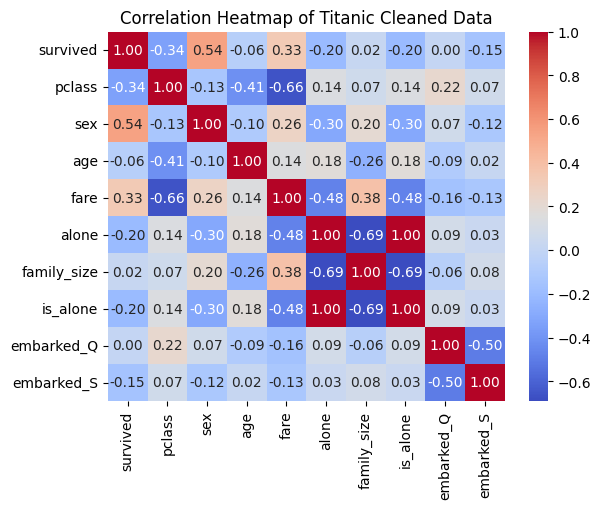

In [84]:
# رسم Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Titanic Cleaned Data")
plt.show()

# Final Touch

In [85]:
from sklearn.model_selection import train_test_split

# ۱. حذف ستون‌های تکراری که در Heatmap کشف کردیم
df_final = df.drop(columns=['alone']) # چون is_alone همان کار را می‌کند

In [86]:
# ۲. جدا کردن ویژگی‌ها (X) از هدف (y)
X = df_final.drop('survived', axis=1)
y = df_final['survived']

In [87]:
# ۳. تقسیم داده‌ها (۸۰٪ برای آموزش، ۲۰٪ برای امتحان نهایی مدل)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
print(f"تعداد داده‌های آموزش: {len(X_train)}")
print(f"تعداد داده‌های تست: {len(X_test)}")

تعداد داده‌های آموزش: 712
تعداد داده‌های تست: 179


# Algorithms

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# تعریف مدل‌ها
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC()
}

# آموزش و ارزیابی
results = {}
for name, model in models.items():
    model.fit(X_train, y_train) # آموزش روی داده‌های تمرینی
    predictions = model.predict(X_test) # تست روی داده‌های دیده نشده
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy

# نمایش نتایج
for name, acc in results.items():
    print(f"{name}: Accuracy = {acc:.2%}")

Logistic Regression: Accuracy = 81.56%
Random Forest: Accuracy = 81.56%
SVM: Accuracy = 60.89%


In [90]:
from sklearn.metrics import classification_report

best_model = RandomForestClassifier(n_estimators=100)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("\n--- گزارش عملکرد دقیق Random Forest ---")
print(classification_report(y_test, y_pred))


--- گزارش عملکرد دقیق Random Forest ---
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       105
           1       0.79      0.80      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



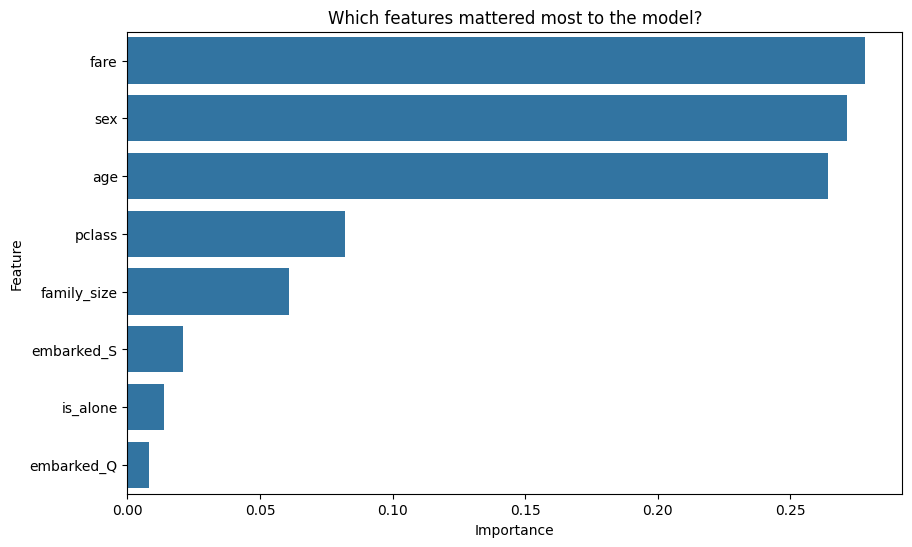

In [91]:
import matplotlib.pyplot as plt

# استخراج اهمیت ویژگی‌ها از Random Forest
importances = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# رسم نمودار
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Which features mattered most to the model?')
plt.show()

In [93]:
# تعریف دوباره مدل بدون پارامتر منسوخ شده
xgb_final = XGBClassifier(eval_metric='logloss', random_state=42)

# انجام دوباره جستجوی پارامترها (GridSearch) برای اطمینان از بهترین دقت
grid_search = GridSearchCV(xgb_final, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
final_acc = accuracy_score(y_test, y_pred)

print(f"🚀 دقت نهایی با مدل XGBoost بهینه شده: {final_acc:.2%}")

🚀 دقت نهایی با مدل XGBoost بهینه شده: 80.45%


# joblib

In [95]:
import joblib

# ۱. ذخیره خودِ مدل
joblib.dump(best_model, 'titanic_model.pkl')

# ۲. ذخیره لیست ستون‌ها (خیلی مهم: چون موقع پیش‌بینی، ورودی باید دقیقاً همین ترتیب را داشته باشد)
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')

print("مدل با موفقیت ذخیره شد!")

مدل با موفقیت ذخیره شد!
